In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt
import geopandas
from folium import plugins

In [2]:
labeldf = pd.read_csv('/Users/sbp/Downloads/labelledData.csv',index_col=0)


In [3]:
labeldf.head()

,Carbon,Methane,Nitrogen,FGas,Risk
2,517.75,4776.82,179.70,80.88,High
4,500.22,2651.58,169.34,63.24,High
5,414.50,2312.60,123.72,54.64,High
9,211.92,1056.19,55.59,21.74,High
10,202.14,986.20,55.52,21.65,High


In [4]:
labeldf.shape

(13762, 5)

In [5]:
labeldf.Risk.unique()

array(['High', 'Low', 'Medium'], dtype=object)

## SVM

## SVM - 

#### For Sentiment Classification using Support Vector Machines, the following steps are followed - 
1. We create 3 separate lables for each of the labels in the data namely - "Low","Medium","High". 


<AxesSubplot:title={'center':'Heatmap showing Correlation between all the features'}>

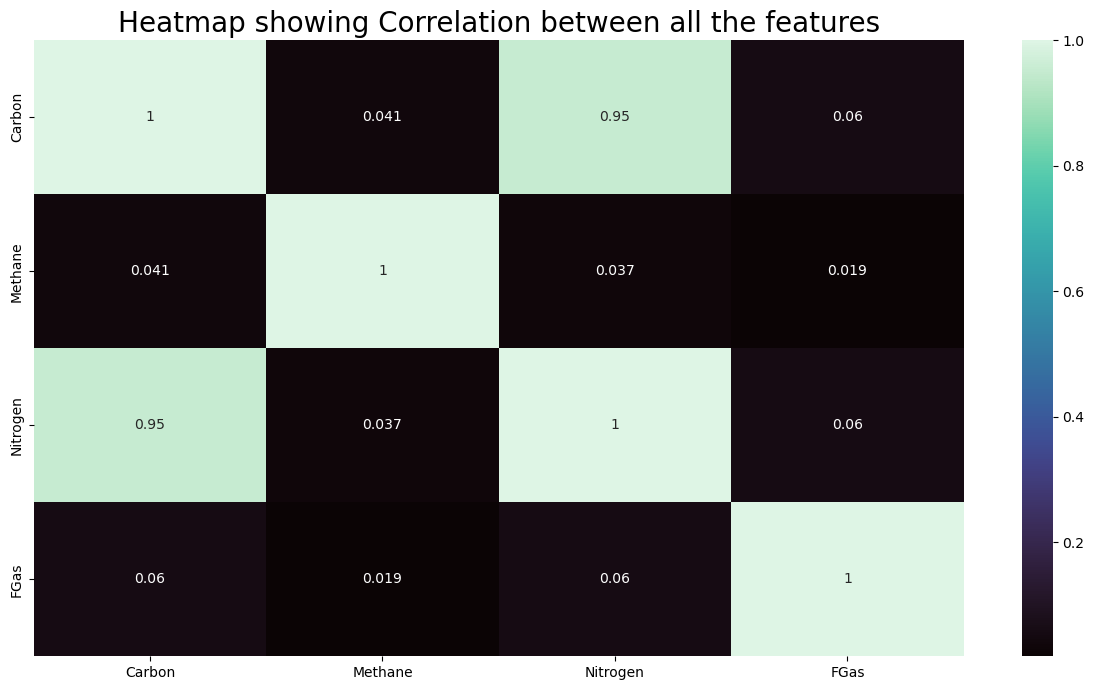

In [6]:
#Plotting the Heatmap to see the correlations between features.

plt.figure(figsize=(15,8))
plt.title("Heatmap showing Correlation between all the features", fontsize=20)
sns.heatmap(labeldf.corr(),annot = True, cmap='mako')

In [7]:
X = labeldf.drop(['Risk'], axis=1)

y = labeldf['Risk']


In [8]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((11009, 4), (2753, 4))

In [10]:
## Feature Scaling

In [11]:
cols = X_train.columns


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [13]:
X_train = pd.DataFrame(X_train, columns=[cols])


In [14]:
X_test = pd.DataFrame(X_test, columns=[cols])


In [15]:
X_train.describe()


,Carbon,Methane,Nitrogen,FGas
count,1.100900e+04,1.100900e+04,1.100900e+04,1.100900e+04
mean,8.462337e-16,-2.527285e-16,-1.816933e-16,-7.225954e-16
std,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00
min,-1.664097e-01,-2.497733e+00,-1.446246e-01,-8.726093e-02
25%,-1.664097e-01,-1.233592e-01,-1.446246e-01,-8.726093e-02
50%,-1.661384e-01,-1.219215e-01,-1.438924e-01,-8.726093e-02
75%,-1.512173e-01,-1.036332e-01,-1.285164e-01,-8.726093e-02
max,1.822528e+01,3.109656e+01,2.604958e+01,3.486519e+01


In [16]:
#Run SVM with default hyperparameters ¶


In [17]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Model accuracy score with default hyperparameters: 0.9571


Confusion matrix

 [[  11    2    0]
 [   0  714  113]
 [   0    3 1910]]


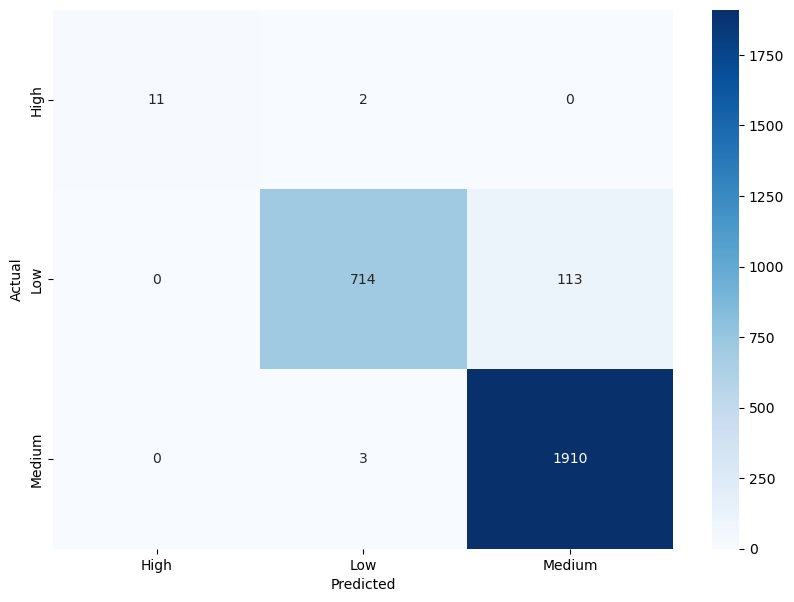

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap="Blues", annot=True, fmt='g')# font size
print('Confusion matrix\n\n', cm)

#Run SVM with rbf kernel and C=100.0We have seen that there are outliers in our dataset. So, we should increase the value of C as higher C means fewer outliers. So, I will run SVM with kernel=rbf and C=100.0.

In [20]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Model accuracy score with rbf kernel and C=100.0 : 0.9844


Confusion matrix

 [[  11    2    0]
 [   0  714  113]
 [   0    3 1910]]


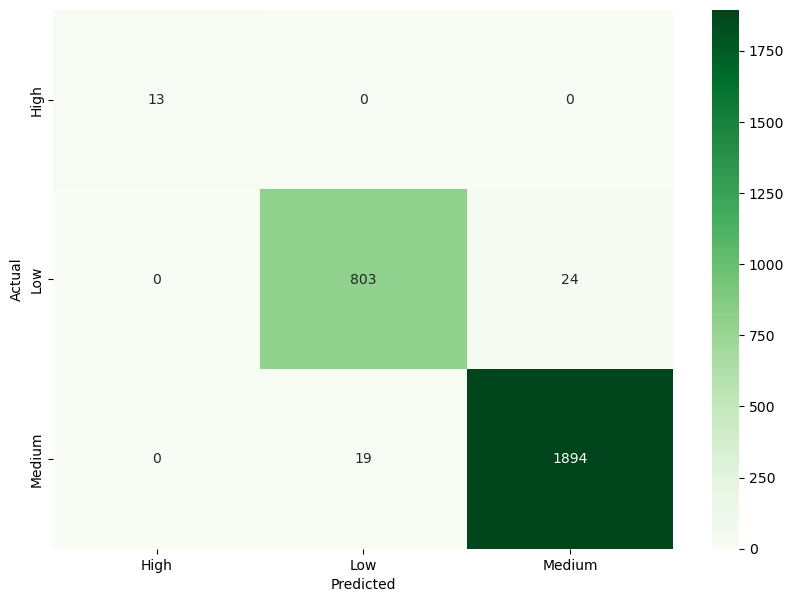

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap="Greens", annot=True, fmt='g')# font size
print('Confusion matrix\n\n', cm)

In [22]:
#Run SVM with rbf kernel and C=1000.0¶


In [23]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Model accuracy score with rbf kernel and C=1000.0 : 0.9873


/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [24]:
#Run SVM with linear kernel


In [25]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Model accuracy score with linear kernel and C=1.0 : 0.9611


/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Confusion matrix

 [[  11    2    0]
 [   0  714  113]
 [   0    3 1910]]


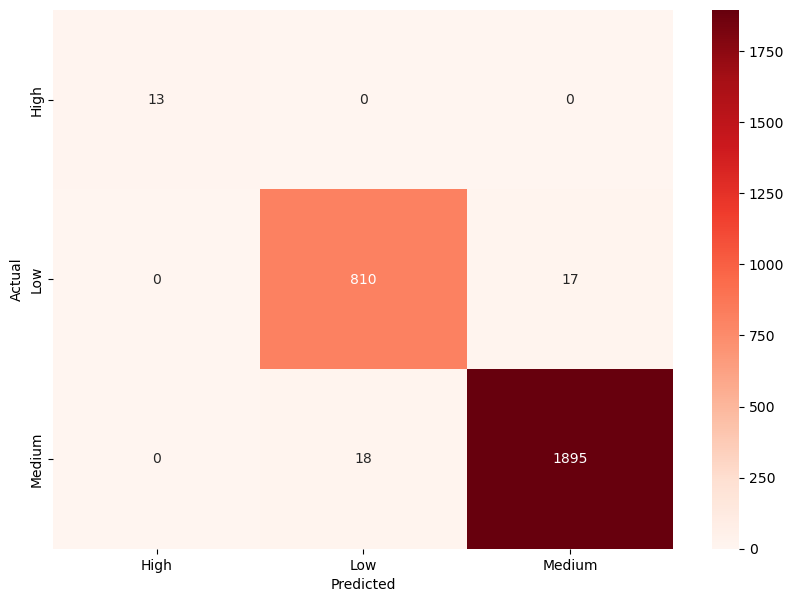

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap="Reds", annot=True, fmt='g')# font size
print('Confusion matrix\n\n', cm)

In [27]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Model accuracy score with linear kernel and C=100.0 : 0.9786


/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [28]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train

/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array(['Medium', 'Medium', 'Low', ..., 'Low', 'Low', 'Medium'],
      dtype=object)

In [29]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9617


Confusion matrix

 [[  11    2    0]
 [   0  714  113]
 [   0    3 1910]]


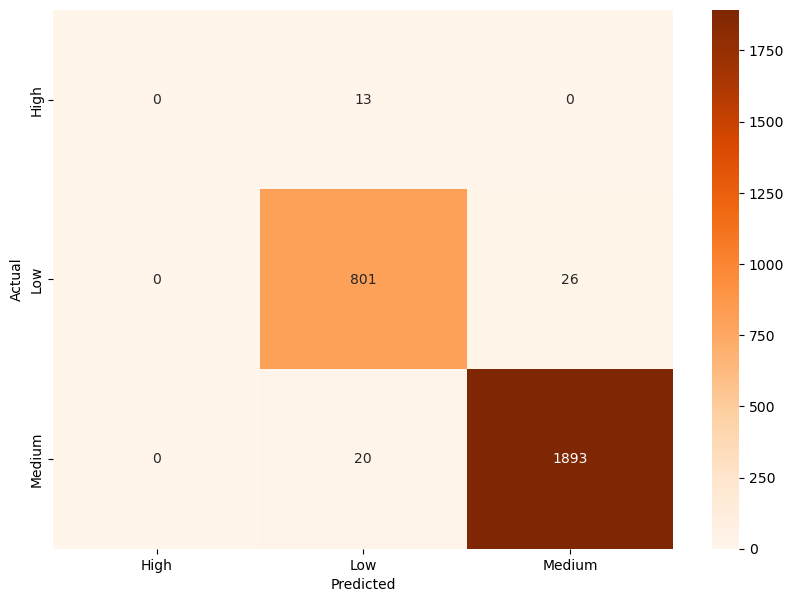

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap="Oranges", annot=True, fmt='g')# font size
print('Confusion matrix\n\n', cm)

In [31]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 


# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Model accuracy score with sigmoid kernel and C=100.0 : 0.8772


/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Confusion matrix

 [[  11    2    0]
 [   0  714  113]
 [   0    3 1910]]


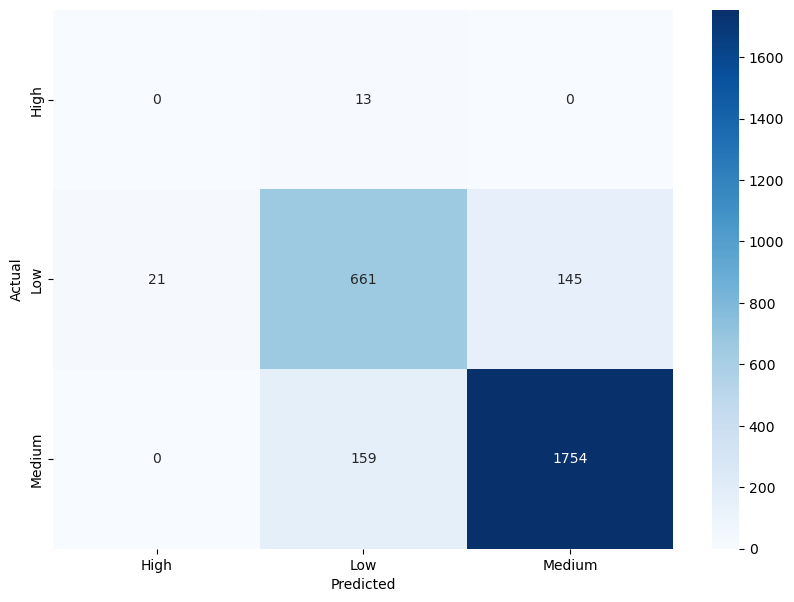

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))

sn.heatmap(df_cm, cmap="Blues", annot=True, fmt='g')# font size
print('Confusion matrix\n\n', cm)



In [ ]:
!pip install scikitplot